 # car sales prediction

In [16]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('used_car_price_dataset_extended.csv')

In [18]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [19]:
df.shape

(10000, 12)

In [20]:
df.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count',
       'price_usd', 'brand', 'transmission', 'color', 'service_history',
       'accidents_reported', 'insurance_valid'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [22]:
df.isnull().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [23]:
# Handling the  null values
df['service_history'].fillna('Partial', inplace=True)

C:\Users\yuvar\AppData\Local\Temp\ipykernel_22972\1611472281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['service_history'].fillna('Partial', inplace=True)


# Exploratory Data analysis

# reduce the car’s price amount based on its age (year-wise depreciation).

In [24]:
# Data Preparation
df['car_age'] = 2025 - df['make_year']

# Price per cc in USD
df['price_per_cc'] = df['price_usd'] / df['engine_cc']

# Price in USD (per 1000 cc)
df['price_usd'] = df['price_per_cc'] * 1000

# Convert USD to INR
usd_to_inr = 83  # current conversion rate
df['price_inr'] = df['price_usd'] * usd_to_inr

# Round values
df['price_per_cc'] = df['price_per_cc']
df['price_inr'] = df['price_inr'].round(2)

In [25]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid,car_age,price_per_cc,price_inr
0,2001,8.17,4000,Petrol,4,2146.910000,Chevrolet,Manual,White,Partial,0,No,24,2.146910,178193.53
1,2014,17.59,1500,Petrol,4,3962.333333,Honda,Manual,Black,Partial,0,Yes,11,3.962333,328873.67
2,2023,18.09,2500,Diesel,5,3709.432000,BMW,Automatic,Black,Full,1,Yes,2,3.709432,307882.86
3,2009,11.28,800,Petrol,1,8545.300000,Hyundai,Manual,Blue,Full,0,Yes,16,8.545300,709259.90
4,2005,12.23,1000,Petrol,2,4625.790000,Nissan,Automatic,Red,Full,0,Yes,20,4.625790,383940.57


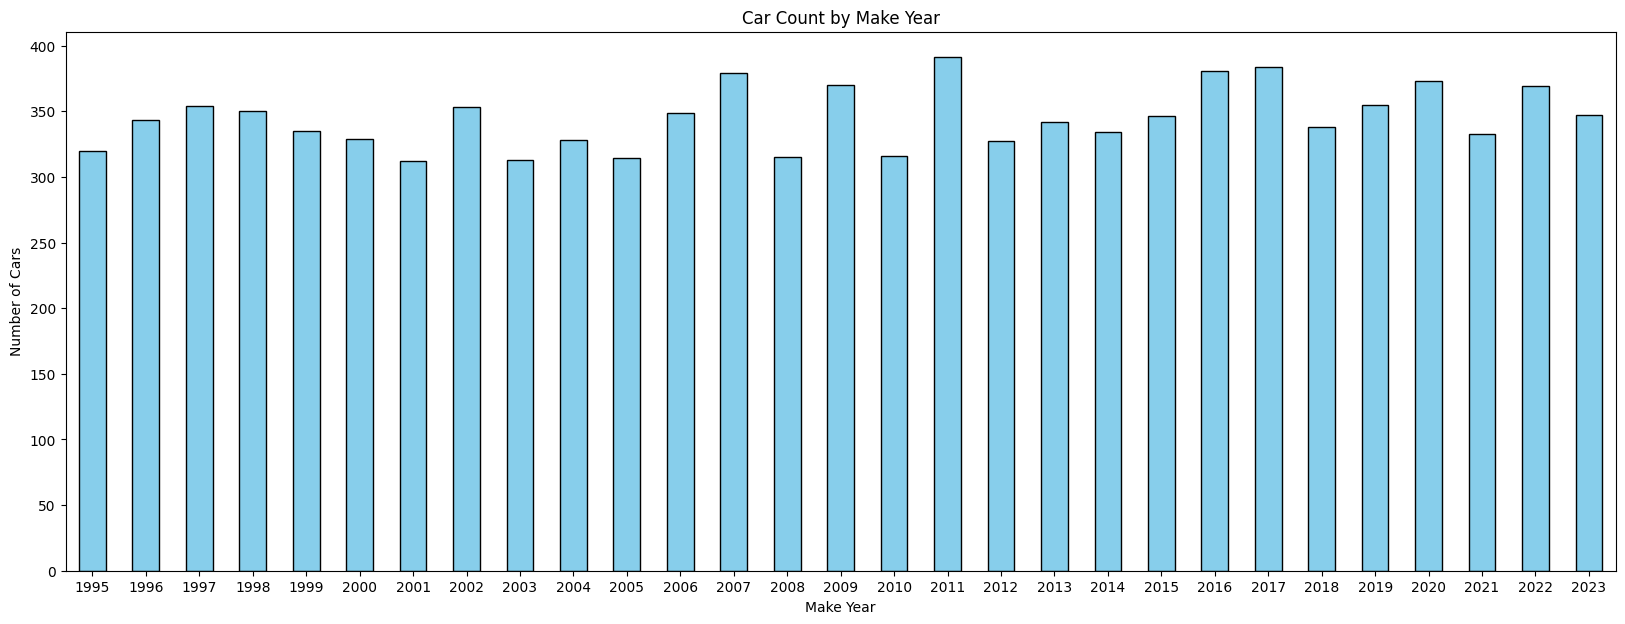

In [26]:
import matplotlib.pyplot as plt
make_year = df['make_year'].value_counts().sort_index()

plt.figure(figsize=(20,7))
make_year.plot(kind='bar', color='skyblue', edgecolor='black')  # 'block' → 'black'
plt.title('Car Count by Make Year')
plt.xlabel('Make Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)  # was misspelled as xtricks
plt.show()

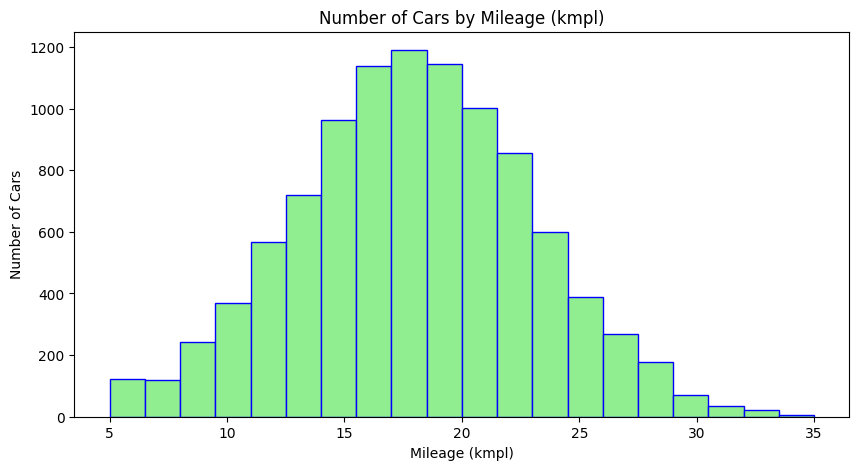

In [27]:
mileage_counts = df['mileage_kmpl'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.hist(df['mileage_kmpl'], bins = 20, color='lightgreen', edgecolor='blue')
plt.title('Number of Cars by Mileage (kmpl)')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)  # better readability if many bars
plt.show()

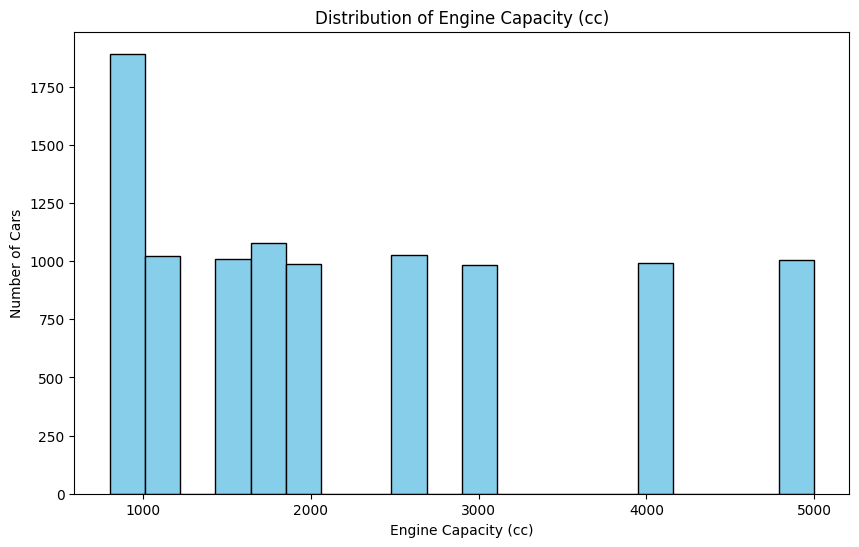

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['engine_cc'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Engine Capacity (cc)')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Number of Cars')
plt.show()

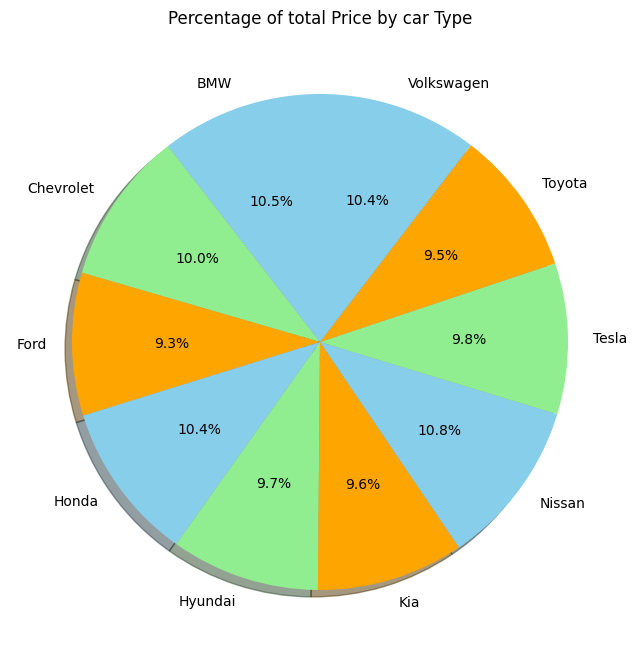

In [29]:
import matplotlib.pyplot as sns

fuel_price = df.groupby ('brand')['price_inr'].sum()

fuel_price_percent = (fuel_price / fuel_price.sum()) * 100
plt.figure(figsize=(8,9))
fuel_price_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen','orange'],
                        shadow=True)
plt.title('Percentage of total Price by car Type')
plt.ylabel('')
plt.show()

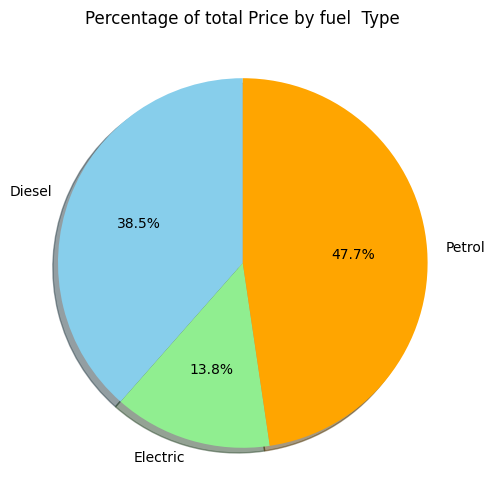

In [30]:
import matplotlib.pyplot as sns

fuel_price = df.groupby ('fuel_type')['price_inr'].sum()

fuel_price_percent = (fuel_price / fuel_price.sum()) * 100
plt.figure(figsize=(8,6))
fuel_price_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen','orange'],
                        shadow=True)
plt.title('Percentage of total Price by fuel  Type')
plt.ylabel('')
plt.show()

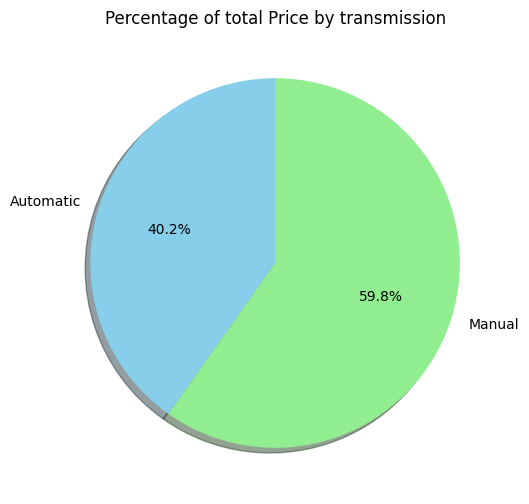

In [31]:
import matplotlib.pyplot as sns

fuel_price = df.groupby ('transmission')['price_inr'].sum()

fuel_price_percent = (fuel_price / fuel_price.sum()) * 100
plt.figure(figsize=(8,6))
fuel_price_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen','orange'],
                        shadow=True)
plt.title('Percentage of total Price by transmission')
plt.ylabel('')
plt.show()

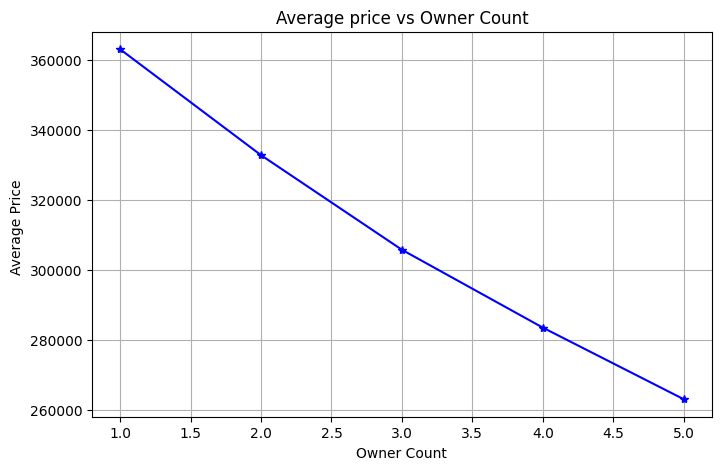

In [32]:
import matplotlib.pyplot as plt
owner_count = df.groupby('owner_count')['price_inr'].mean()
plt.figure(figsize=(8,5))
owner_count.plot(kind='line', marker = '*', color = 'blue')
plt.title('Average price vs Owner Count')
plt.xlabel('Owner Count')
plt.ylabel('Average Price ')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

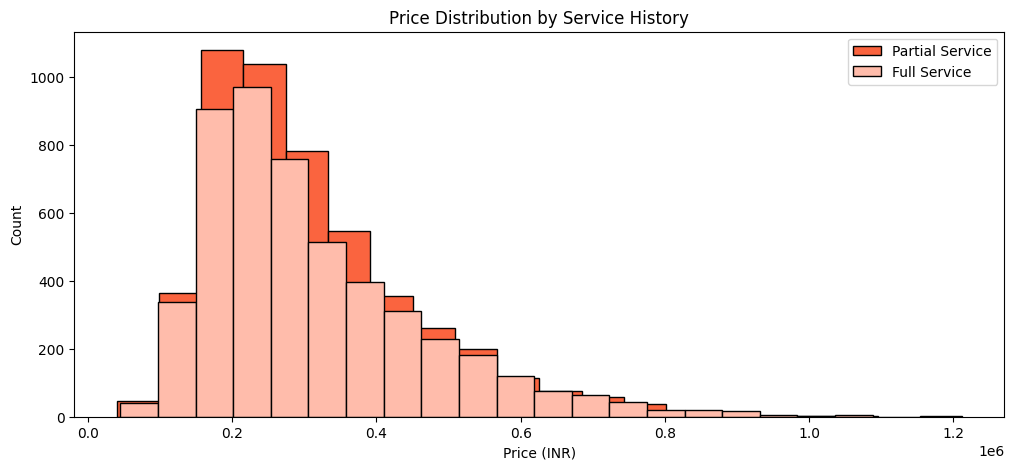

In [33]:
import matplotlib.pyplot as plt

# Histogram: Full vs Partial service history
plt.figure(figsize=(12,5))
plt.hist(df[df['service_history'] == 'Full']['price_inr'], 
         histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Partial Service')
plt.hist(df[df['service_history'] == 'Partial']['price_inr'], 
         histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Full Service')
plt.legend()
plt.title('Price Distribution by Service History')
plt.xlabel('Price (INR)')
plt.ylabel('Count')
plt.show()

<Figure size 800x500 with 0 Axes>

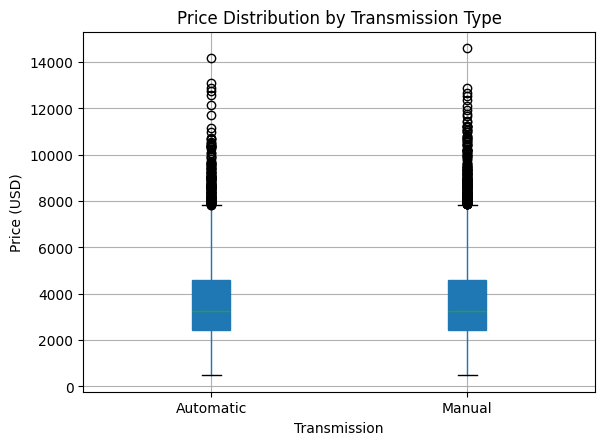

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.boxplot(column='price_usd', by='transmission', patch_artist=True)
plt.title('Price Distribution by Transmission Type')
plt.suptitle('')  # remove default 'Boxplot grouped by transmission'
plt.xlabel('Transmission')
plt.ylabel('Price (USD)')
plt.show()

# Statistics part

In [35]:
avg_price  = df["price_per_cc"].mean()
std_price = df["price_per_cc"].std()
print("Average engine size: ", avg_price)
print("Standard Deviation of Price:", std_price)

Average engine size:  3.729324543511111
Standard Deviation of Price: 1.8054113068982933


In [36]:
avg_mileage = df['mileage_kmpl'].mean()
std_mileage = df['mileage_kmpl'].std()
print(f"average mileage size: {avg_mileage:.1f} cc (± {std_mileage:.1f})")

average mileage size: 18.0 cc (± 5.0)


In [37]:
avg_age = df["car_age"].mean()
std_age = df["car_age"].std()
print(f"Average car age: {avg_age:.1f} years (± {std_age:.1f})")

Average car age: 15.8 years (± 8.4)


In [38]:
avg_owners = df["owner_count"].mean()
std_owners = df["owner_count"].std()
print(f"Average owners: {avg_owners:.1f} (± {std_owners:.1f})")

Average owners: 3.0 (± 1.4)


In [39]:
mean_fuel = df.groupby("fuel_type")["price_per_cc"].agg(["mean", "std"]).sort_values("mean", ascending=False)
print(mean_fuel)

               mean       std
fuel_type                    
Electric   5.294677  2.258812
Petrol     3.578063  1.657139
Diesel     3.538790  1.671864


In [40]:
mean_service = df.groupby("service_history")["price_per_cc"].agg(["mean", "std"]).sort_values("mean", ascending=False)
print(mean_service)

                     mean       std
service_history                    
Partial          3.742898  1.855964
Full             3.715680  1.753207


# Inferential statistics 

# Do cars with Full service history have a different average number of 
# owners compared to cars with Partial service history?

In [ ]:
# Do cars with Full service history have a different average number of 
# owners compared to cars with Partial service history?
#T-test (Welch’s t-test) to compare owner counts between Full and Partial service cars
# H0 (Null Hypothesis): Mean owner_count of Full service cars = Mean owner_count of Partial service cars
# H1 (Alternate Hypothesis): Mean owner_count of Partial service cars > Mean owner_count of Full service cars

In [41]:
# T -test 
from scipy .stats import ttest_ind
full_prices = df[df["service_history"] == "Full"]["owner_count"]
partial_prices = df[df["service_history"] == "Partial"]["owner_count"]
t_stat, p_val = ttest_ind(full_prices, partial_prices, equal_var=False)
print(f"test(full vs Partial service price): t = {t_stat:.2f}, p = {p_val:.3f}")

test(full vs Partial service price): t = -2.52, p = 0.012


In [42]:
df['service_history'] = df ['service_history'].str.lower()
df['brand'] = df['brand'].str.lower()
df['transmission'] = df['transmission'].str.lower()
df['fuel_type'] = df['fuel_type'].str.lower()
df['color'] = df['color'].str.lower()

# Feature Engineering techniques

In [43]:
from sklearn.preprocessing import LabelEncoder 

# Create a label Encoder object
le = LabelEncoder()

df['insurance_valid'] = le.fit_transform(df['insurance_valid'].values)

# Machine learning algorithm

In [44]:
# Machine learning algorithm
from sklearn. preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

In [45]:
x = df.drop(columns=['car_age', 'price_usd' ,'price_per_cc', 'price_inr'])
y = df['price_inr']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [47]:
preprocessor  = ColumnTransformer(transformers=[
    ('Ordinal', OrdinalEncoder(), ['fuel_type','brand','service_history','color','transmission']),
    ('num', StandardScaler(), ['make_year','mileage_kmpl','engine_cc','owner_count','accidents_reported','insurance_valid'])
], remainder ='passthrough')

In [48]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

In [49]:
pipeline.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Ordinal', ...), ('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [50]:
# Predictions
y_pred  = pipeline.predict(x_test)

In [51]:
y_pred

array([217179.95, 533409.3 , 262978.6 , ..., 215327.61, 847458.2 ,
       207730.84], dtype=float32)

In [52]:
r2_score(y_test, y_pred)

0.8310774502589471

In [53]:
kfold = KFold(n_splits=5, shuffle = True, random_state=42)
cv_results = cross_val_score(pipeline, x,y, cv=kfold, scoring = 'r2')

In [54]:
cv_results.mean()

0.8283144986110453

In [55]:
with open('car sales price_model.pkl','wb') as f:
    pickle.dump(pipeline,f)

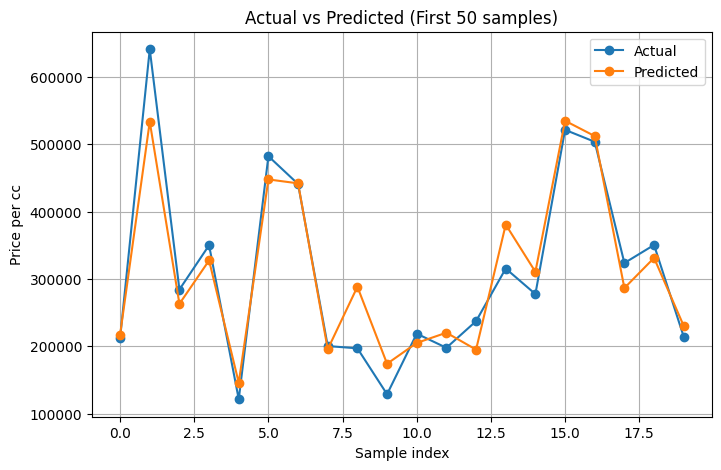

In [56]:
# Regressio
plt.figure(figsize=(8,5))
plt.plot(y_test.values[:20],label="Actual", marker='o')
plt.plot(y_pred[:20],label='Predicted', marker='o')
plt.xlabel("Sample index")
plt.ylabel("Price per cc")
plt.title("Actual vs Predicted (First 50 samples)")
plt.legend()
plt.grid(True)
plt.show()

In [61]:
import pandas as pd
sample = pd.DataFrame([{"make_year" : 2023, "mileage_kmpl": 18.09,
    "engine_cc": 2500,
    "fuel_type": "diesel",
    "owner_count": 5,
    "brand": "bmw",
    "transmission": "automatic",
    "color": "black",
    "service_history": "full",
    "accidents_reported": 1,
    "insurance_valid": 1
}])
y_pred = pipeline.predict(sample)
print(y_pred)

[295435.4]


In [77]:
y_log = np.log1p(y)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y_log, test_size=0.2, random_state = 42)

In [79]:
preprocessor  = ColumnTransformer(transformers=[
    ('Ordinal', OrdinalEncoder(), ['fuel_type','brand','service_history','color','transmission']),
    ('num', StandardScaler(), ['make_year','mileage_kmpl','engine_cc','owner_count','accidents_reported','insurance_valid'])
], remainder ='passthrough')

In [80]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

In [83]:
pipeline.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Ordinal', ...), ('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [61]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import mlflow
import mlflow.sklearn
import joblib
from scipy.stats import randint, uniform

# -------------------------
# CONFIG
# -------------------------
DATA_PATH = "used_car_price_dataset_extended.csv"
MLFLOW_TRACKING_URI = "file:./mlruns"
EXPERIMENT_NAME = "car_price_regression"
RANDOM_STATE = 42
TEST_SIZE = 0.2

NUMERIC_FEATURES = ["year", "mileage", "engine_size", "owner_count", "accident_report"]
CATEGORICAL_FEATURES = ["brand", "service_history", "fuel", "transmission", "insurance_valid"]

TARGET_COL = "price_usd"

# -------------------------
# Load data
# -------------------------
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Data file not found: {DATA_PATH}")

df = pd.read_csv(DATA_PATH)
print("Loaded dataset shape:", df.shape)

if TARGET_COL not in df.columns:
    raise KeyError(f"Target column '{TARGET_COL}' missing. Found columns: {df.columns.tolist()}")

df = df.dropna(subset=[TARGET_COL]).reset_index(drop=True)

# -------------------------
# Validate feature lists
# -------------------------
NUMERIC_FEATURES = [c for c in NUMERIC_FEATURES if c in df.columns]
CATEGORICAL_FEATURES = [c for c in CATEGORICAL_FEATURES if c in df.columns]

if not NUMERIC_FEATURES and not CATEGORICAL_FEATURES:
    raise ValueError("No valid features found!")

X = df[NUMERIC_FEATURES + CATEGORICAL_FEATURES]
y = df[TARGET_COL].astype(float)

# -------------------------
# Train / Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

print("Train:", X_train.shape, "Test:", X_test.shape)

# -------------------------
# Preprocessing
# -------------------------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, NUMERIC_FEATURES),
    ("cat", categorical_transformer, CATEGORICAL_FEATURES)
])

# -------------------------
# Model Pipeline
# -------------------------
rf = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", rf)
])

# -------------------------
# Hyperparameter search
# -------------------------
param_distributions = {
    "regressor__n_estimators": randint(100, 400),
    "regressor__max_depth": randint(5, 30),
    "regressor__min_samples_split": randint(2, 10),
    "regressor__min_samples_leaf": randint(1, 6),
    "regressor__max_features": ["auto", "sqrt", 0.5, 0.8]
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    scoring="neg_root_mean_squared_error",
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

# -------------------------
# MLflow
# -------------------------
mlflow.set_tracking_uri()
mlflow.set_experiment(EXPERIMENT_NAME)

# -------------------------
# Train + Log
# -------------------------
with mlflow.start_run():
    print("\n===== Training & Hyperparameter Tuning =====")
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    print("Best params:", search.best_params_)
    

    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.3f}")

    # Log params
    mlflow.log_param("model_type", "RandomForestRegressor")
    for k, v in search.best_params_.items():
        mlflow.log_param(k, v)

    # Log metrics
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)

    # Log model
    mlflow.sklearn.log_model(best_model, artifact_path="model")

    # Save locally
    local_path = "models/car_price_model.joblib"
    os.makedirs(os.path.dirname(local_path), exist_ok=True)
    joblib.dump(best_model, local_path)
    print("\nLocal model saved to:", local_path)

    run_id = mlflow.active_run().info.run_id
    print("\nMLflow run_id:", run_id)

print("\n===== DONE =====")
print("\nTo view MLflow UI, run:\n  mlflow ui\nOpen: http://127.0.0.1:5000\n")
print(f"Load model later via: runs:/{run_id}/model")

Loaded dataset shape: (10000, 12)
Train: (8000, 5) Test: (2000, 5)

===== Training & Hyperparameter Tuning =====
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'regressor__max_depth': 5, 'regressor__max_features': 0.8, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 7, 'regressor__n_estimators': 352}


2025/11/18 22:18:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RMSE: 2737.96, MAE: 2203.78, R2: 0.058


2025/11/18 22:19:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Local model saved to: models/car_price_model.joblib

MLflow run_id: d0fd21c37a97405892d939516583c725

===== DONE =====

To view MLflow UI, run:
  mlflow ui
Open: http://127.0.0.1:5000

Load model later via: runs:/d0fd21c37a97405892d939516583c725/model
